In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [2]:
# !pip install -r requirements.txt # После первого запуска можно закомментировать 

In [3]:
# Load the dataset
path = "data/housing.csv"
df = pd.read_csv(path)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
median_house_value = df.groupby('ocean_proximity').tail(1)
median_house_value = median_house_value[['ocean_proximity','median_house_value']]
median_house_value.sort_values(by='median_house_value',ascending=False)
median_house_value = median_house_value.sort_values(by='median_house_value',ascending=False).reset_index(drop=True)
styled_object = median_house_value.style.background_gradient(cmap='gist_ncar').highlight_max('median_house_value').set_caption('Population')
display(styled_object)

In [12]:
# Группировка по ocean_proximity (Описательная статистика)
df.groupby('ocean_proximity').agg(['sum', 'median', 'min', 'max', 'std']).drop(['longitude', 'latitude'], axis=1)

housing_median_age                               total_rooms  \
                               sum median   min   max        std         sum   
ocean_proximity                                                                
<1H OCEAN                 267495.0   30.0   2.0  52.0  11.644453  24012547.0   
INLAND                    159005.0   23.0   1.0  52.0  12.018020  17803933.0   
ISLAND                       212.0   52.0  27.0  52.0  13.164346      7873.0   
NEAR BAY                   86402.0   39.0   2.0  52.0  13.070385   5710320.0   
NEAR OCEAN                 78005.0   29.0   2.0  52.0  11.840371   6867477.0   

                                                      ... median_income  \
                 median    min      max          std  ...           sum   
ocean_proximity                                       ...                 
<1H OCEAN        2108.0   11.0  37937.0  2160.463696  ...    38651.5100   
INLAND           2131.0    2.0  39320.0  2385.831111  ...    21022.1353   
ISLAND           1675.0  716.0   2359.0   707.545264  ...       13.7221   
NEAR BAY         2083.0    8.0  18634.0  1830.817022  ...     9555.9061   
NEAR OCEAN       2195.0   15.0  30405.0  1990.724760  ...    10647.3760   

                                                    median_house_value  \
                  median     min      max       std                sum   
ocean_proximity                                                          
<1H OCEAN        3.87500  0.4999  15.0001  2.001223       2.193410e+09   
INLAND           2.98770  0.4999  15.0001  1.437465       8.176001e+08   
ISLAND           2.73610  2.1579   3.3906  0.444180       1.902200e+06   
NEAR BAY         3.81865  0.4999  15.0001  2.017427       5.935962e+08   
NEAR OCEAN       3.64705  0.5360  15.0001  2.010558       6.629955e+08   

                                                              
                   median       min       max            std  
ocean_proximity                                               
<1H OCEAN        214850.0   17500.0  500001.0  106124.292213  
INLAND           108500.0   14999.0  500001.0   70007.908494  
ISLAND           414700.0  287500.0  450000.0   80559.561816  
NEAR BAY         233800.0   22500.0  500001.0  122818.537064  
NEAR OCEAN       229450.0   22500.0  500001.0  122477.145927  

[5 rows x 35 columns]

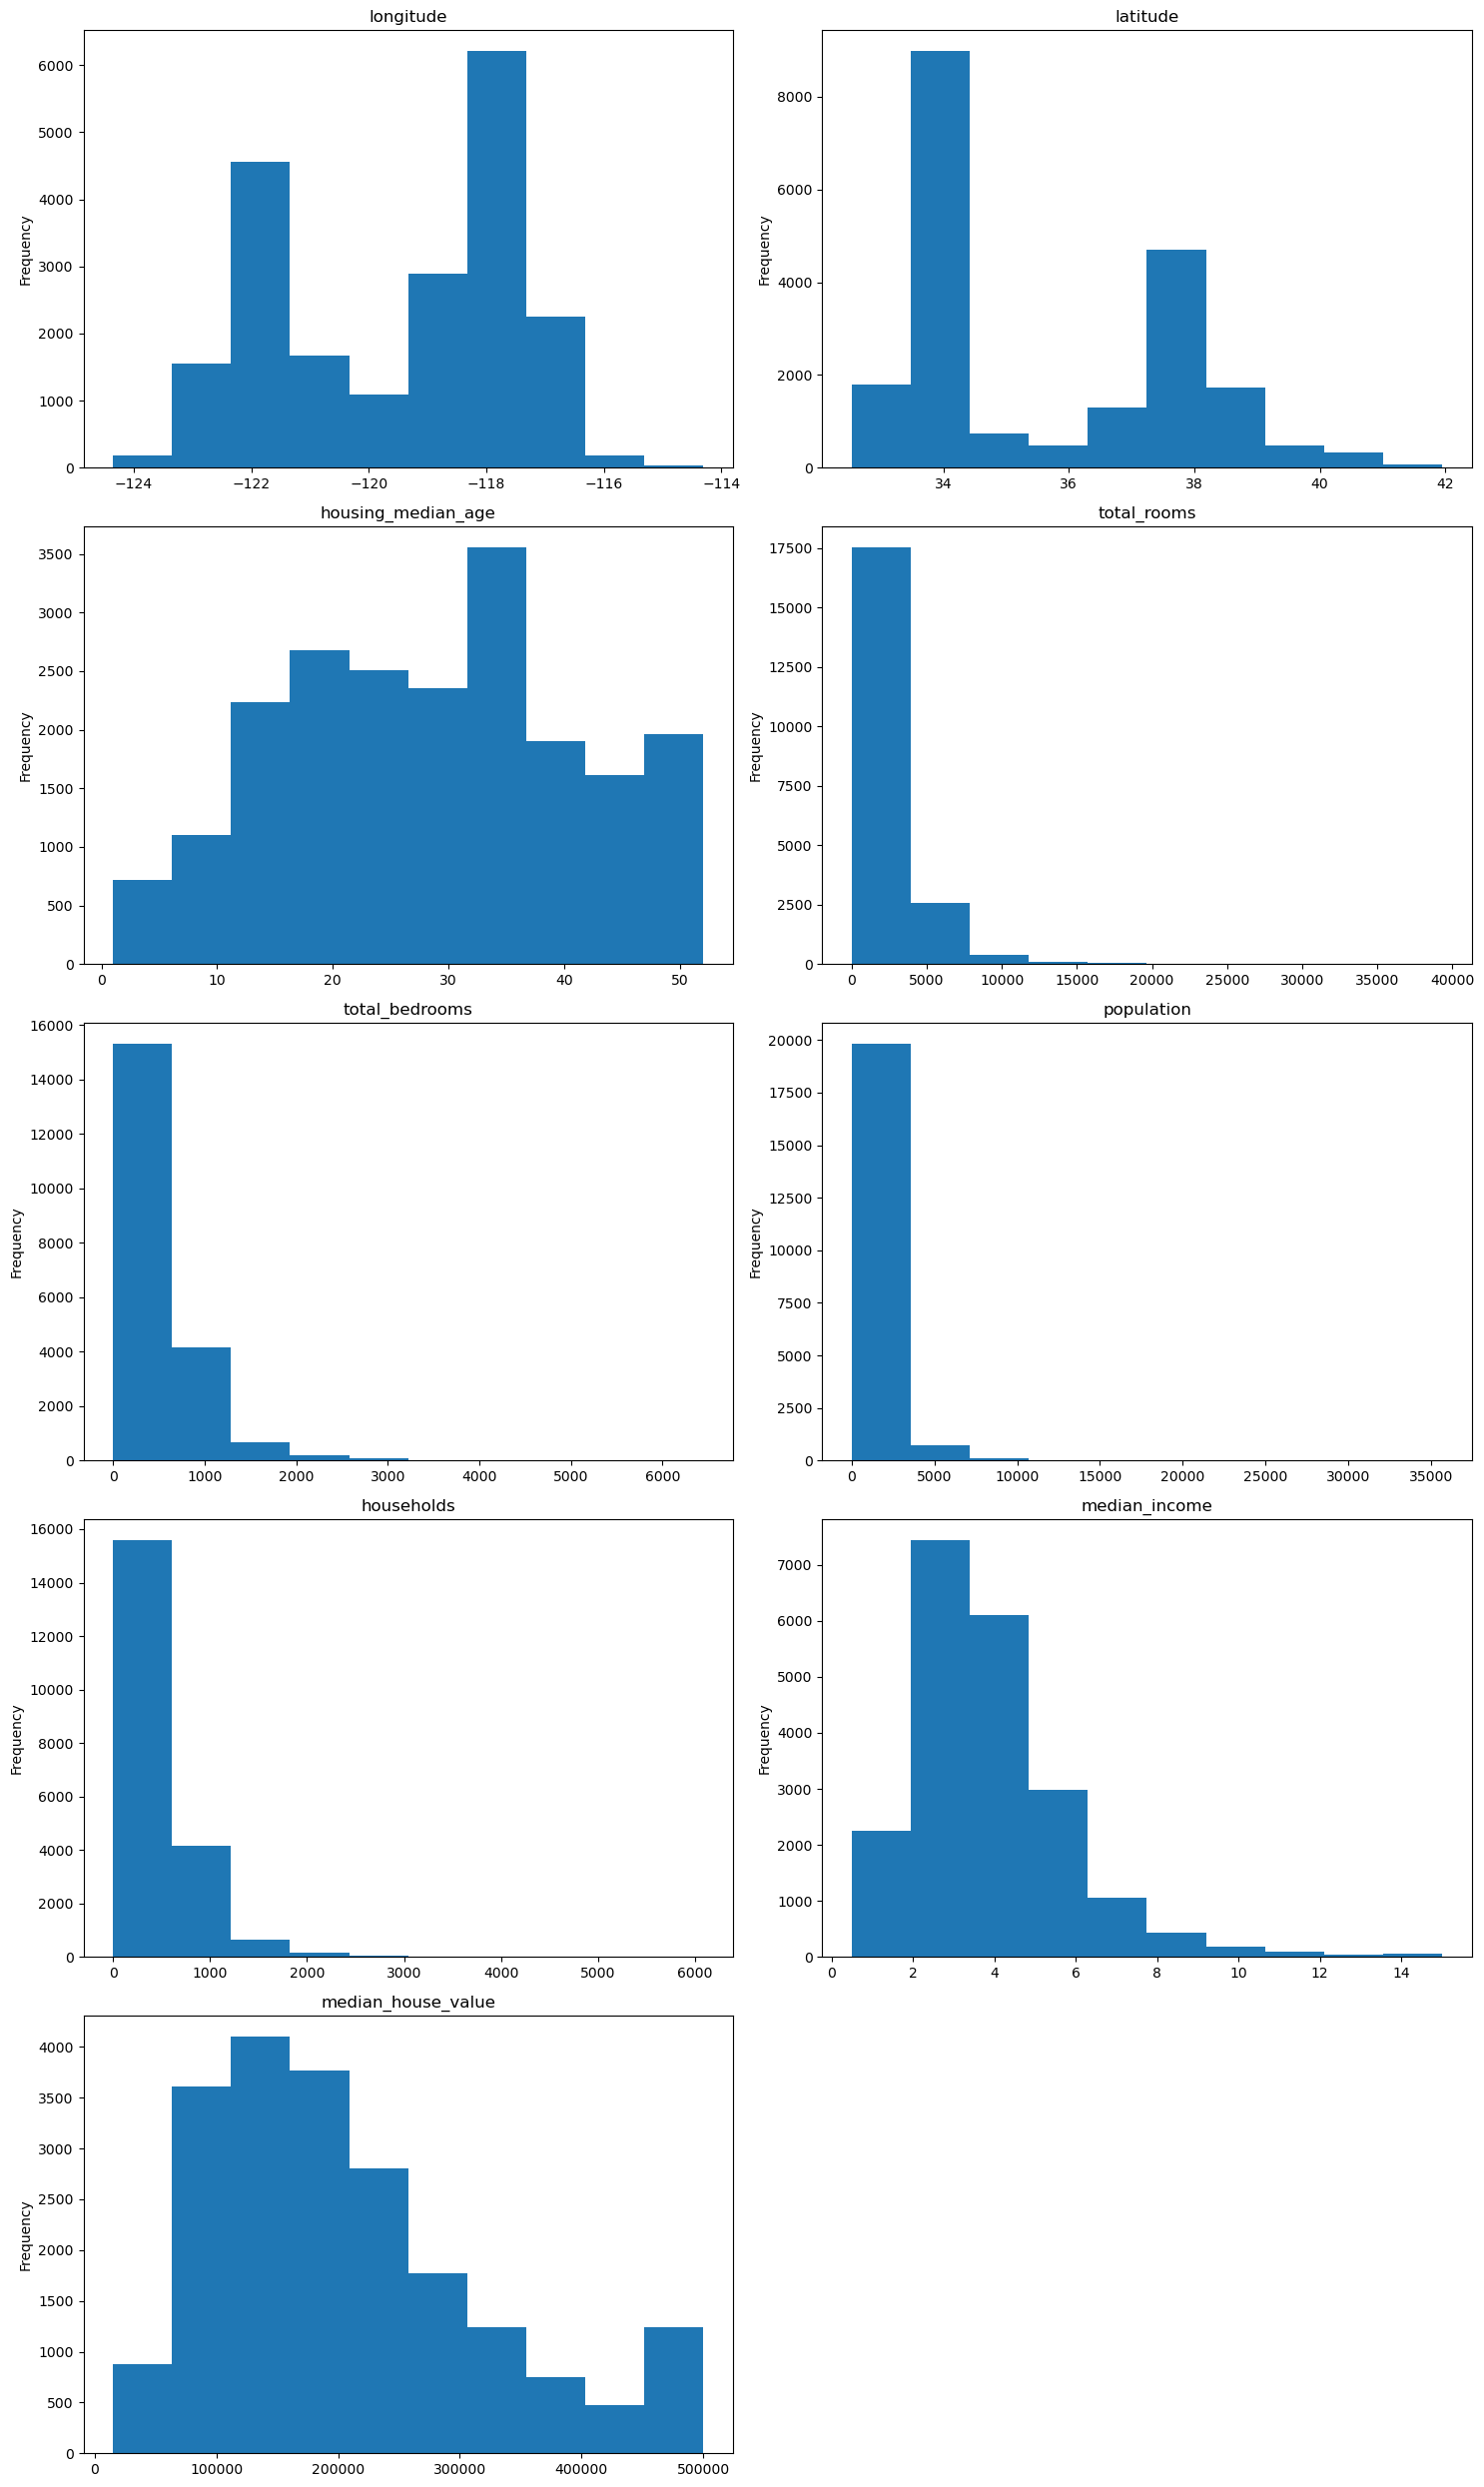

In [8]:
# Get the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Calculate number of rows needed for subplots
num_rows = len(num_cols) // 2  # 2 here represents 2 plots per row
if len(num_cols) % 2:  # if there's an odd number of plots
    num_rows += 1  # add an additional row

plt.figure(figsize=[15, num_rows*5])

for index, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, index+1)
    df[col].plot(kind='hist', title=col)

plt.tight_layout()  # adjusts subplot params so subplots don't overlap
plt.show()

In [34]:
# Визуализация распределения ' Общее количество комнат в жилом блоке.' по Калифорнии
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="total_rooms",
                        size="total_rooms", color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=3, mapbox_style="carto-positron")
fig.show()


In [11]:
# Визуализация распределения 'Медианная стоимость домов в определенном районе' по Калифорнии
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="median_house_value",
                        size="population", color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=3, mapbox_style="carto-positron")
fig.show()


/var/folders/ss/cs_0qyzs49q3zrgngm3x6tqc0000gn/T/ipykernel_70711/3314874698.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



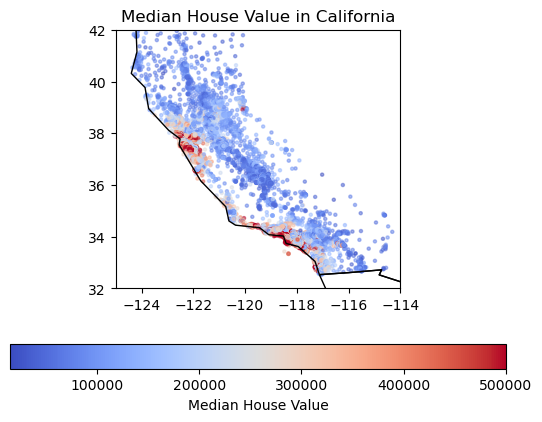

In [24]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# California Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
CA = world[world.name == "California"]

# Create a figure and axes
fig, ax = plt.subplots(1, 1)

# Plot the country borders
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the data
gdf.plot(column='median_house_value', ax=ax, legend=True, 
         legend_kwds={'label': "Median House Value", 
                      'orientation': "horizontal"}, 
         markersize=5, cmap='coolwarm', alpha=0.5)

# Set the limits to focus on California
plt.xlim([-125, -114])
plt.ylim([32, 42])

plt.title('Median House Value in California')
plt.show()

- Медианные значения стоимости домов распределены по всему штату Калифорния. Мы можем увидеть, что население и стоимость домов связаны, что показано через размер и цвет точек на карте

In [25]:
# Создание точечной диаграммы Median House Value vs Median Income
fig = px.scatter(df, 
                 x="median_income", 
                 y="median_house_value", 
                 trendline="ols",
                 color="ocean_proximity",  # change color based on the ocean proximity
                 size='population',  # change size based on the population
                 hover_data=['longitude', 'latitude'],  # add longitude and latitude data on hover
                 title='Median House Value vs Median Income',
                 labels={'median_income':'Median Income', 
                         'median_house_value':'Median House Value'}
                )

# Update the markers
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

# Show the figure
fig.show()

In [13]:
# Точечная диаграмма для total_rooms и total_bedrooms (раскрасим по median_house_value)
fig = px.scatter(df, x='total_rooms', y='total_bedrooms', color='median_house_value')
fig.show()

In [14]:
# Матрица корреляция
fig = px.imshow(df.corr())
fig.show()

/var/folders/ss/cs_0qyzs49q3zrgngm3x6tqc0000gn/T/ipykernel_70711/610867110.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



- Корреляционный анализ позволяет нам увидеть степень связи между различными переменными в нашем наборе данных. Чем ближе коэффициент корреляции к 1 или -1, тем сильнее связь между переменными. Если коэффициент близок к 0, это означает, что связь между переменными слабая

{'message': 'You are not subscribed to this API.'}
